In [99]:
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib
import matplotlib.pyplot as plt
from datetime import date
import numpy as np
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)

months_zoom = 3

In [100]:
#source: https://www.cdc.gov/growthcharts/percentile_data_files.htm
male = 1
female = 2

gender = female


curves = {
    'P3': 'bold',
    'P5': 'dashed',
    'P10': 'dashed',
    'P25' : 'dashed',
    'P50' :'bold',
    'P75' : 'dashed',
    'P90' : 'dashed',
    'P95' : 'dashed',
    'P97': 'bold'
}

#loading weight curves info
df_winfo = pd.read_csv('data/wtageinf.csv')
df_winfo = df_winfo[df_winfo['Sex'] == gender]

#loading heigth curves info
df_hinfo = pd.read_csv('data/lenageinf.csv')
df_hinfo = df_hinfo[df_hinfo['Sex'] == gender]

#loading head circunference curves info
df_hcinfo = pd.read_csv('data/hcageinf.csv')
df_hcinfo = df_hcinfo[df_hcinfo['Sex'] == gender]

### Loading baby feed, weigths and size history file

In [101]:
df = pd.read_excel('feed-history.xlsx')
df['Weight'] = df['Weight'] / 1000
birth_date = date(2020, 3, 3)
dates = pd.to_datetime(df[['Year', 'Month', 'Day']]).dt.date
df['Date'] = dates
df['Age_days'] = (dates - birth_date)
df['Age_weeks'] = np.ceil((dates - birth_date) /np.timedelta64(1, 'W'))
df['Age_months'] = np.floor((dates - birth_date) /np.timedelta64(1, 'M'))

scaler = MinMaxScaler()
scaler.fit(df['Day'].values.reshape(-1, 1))
day_scaled = scaler.fit_transform(df['Day'].values.reshape(-1, 1)).reshape(-1)
df['Age_months'] = df['Age_months'] + day_scaled
df.head()


,Year,Month,Day,Hour,Minutes,Volume,Weight,Height,HC,Date,Age_days,Age_weeks,Age_months
0,2020.0,3.0,3.0,6.0,7.0,0.0,3.17,51.0,33.6,2020-03-03,0 days,0.0,0.066667
1,2020.0,3.0,8.0,15.0,0.0,30.0,3.01,NaN,NaN,2020-03-08,5 days,1.0,0.233333
2,2020.0,3.0,8.0,17.0,30.0,30.0,NaN,NaN,NaN,2020-03-08,5 days,1.0,0.233333
3,2020.0,3.0,8.0,18.0,40.0,49.0,NaN,NaN,NaN,2020-03-08,5 days,1.0,0.233333
4,2020.0,3.0,8.0,22.0,0.0,48.0,NaN,NaN,NaN,2020-03-08,5 days,1.0,0.233333


# Weigth growth chart

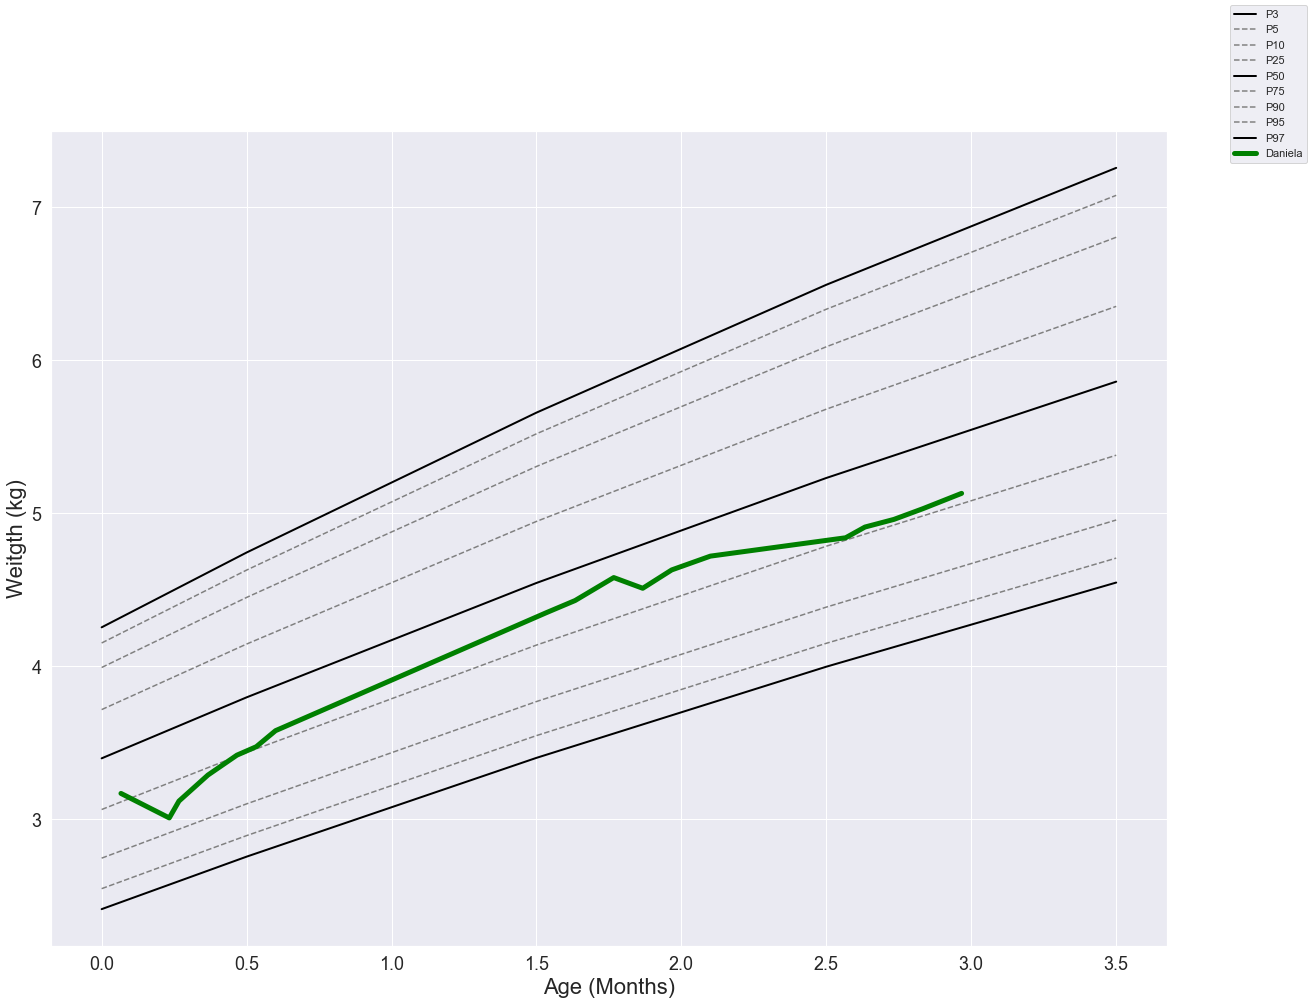

In [102]:
def plot_curve(months_zoom):
    
    df_info_zoom = df_winfo[df_winfo['Agemos'] <= months_zoom +0.5]
    df_zoom = df[df['Age_months'] <= months_zoom].dropna(subset=['Weight'])
    
    fig, ax1 = plt.subplots(figsize=(20,15))
    ax1.set_xlabel("Age (Months)", {'size':22})
    ax1.set_ylabel("Weitgth (kg)", {'size':22})

    for key, config in curves.items():
        if config == 'bold':
            ax1.plot(df_info_zoom['Agemos'], df_info_zoom[key], label=key, linestyle='-', linewidth=2, color='black')
        if config == 'dashed':
            ax1.plot(df_info_zoom['Agemos'], df_info_zoom[key], label=key, linestyle='--', color='gray')
    
    ax1.plot(df_zoom['Age_months'], df_zoom['Weight'], label='Daniela', linestyle='-', linewidth=5, color='green')
    fig.legend(loc='upper right')
    plt.show()

plot_curve(months_zoom)
    

# Height History

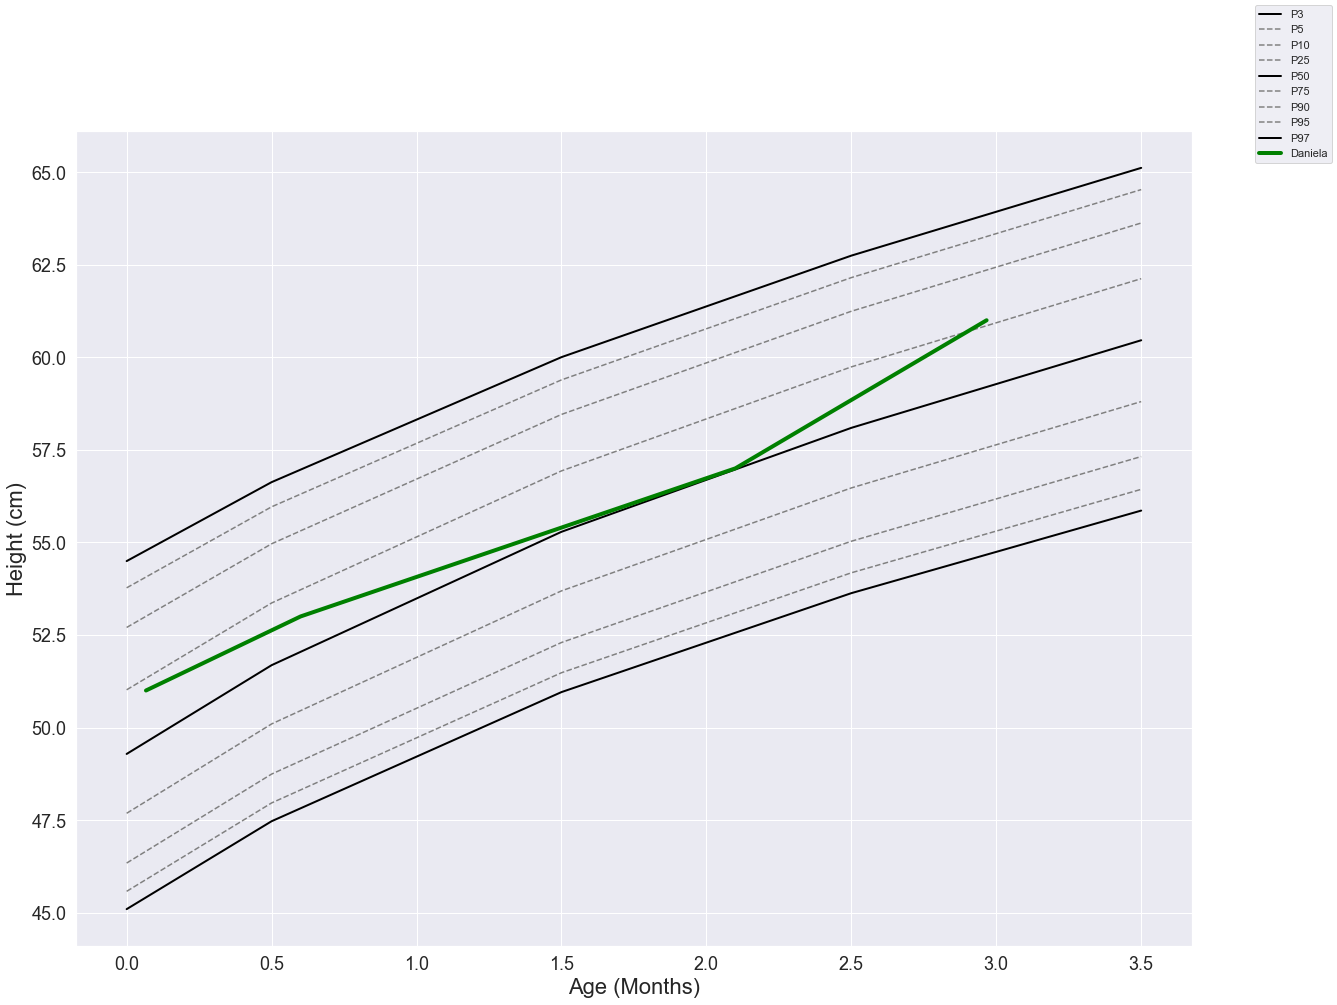

In [103]:
def plot_curve(months_zoom):
    df_info_zoom = df_hinfo[df_hinfo['Agemos'] <= months_zoom +0.5]
    df_zoom = df[df['Age_months'] <= months_zoom].dropna(subset=['Height'])
    
    fig, ax1 = plt.subplots(figsize=(20,15))
    ax1.set_xlabel("Age (Months)", {'size':22})
    ax1.set_ylabel("Height (cm)", {'size':22})

    for key, config in curves.items():
        if config == 'bold':
            ax1.plot(df_info_zoom['Agemos'], df_info_zoom[key], label=key, linestyle='-', linewidth=2, color='black')
        if config == 'dashed':
            ax1.plot(df_info_zoom['Agemos'], df_info_zoom[key], label=key, linestyle='--', color='gray')
    
    ax1.plot(df_zoom['Age_months'], df_zoom['Height'], label='Daniela', linestyle='-', linewidth=4, color='green')
    fig.legend(loc='upper right')
    plt.show()
    
if not interactive:
    plot_curve(months_zoom)

# Milk Volume per day history

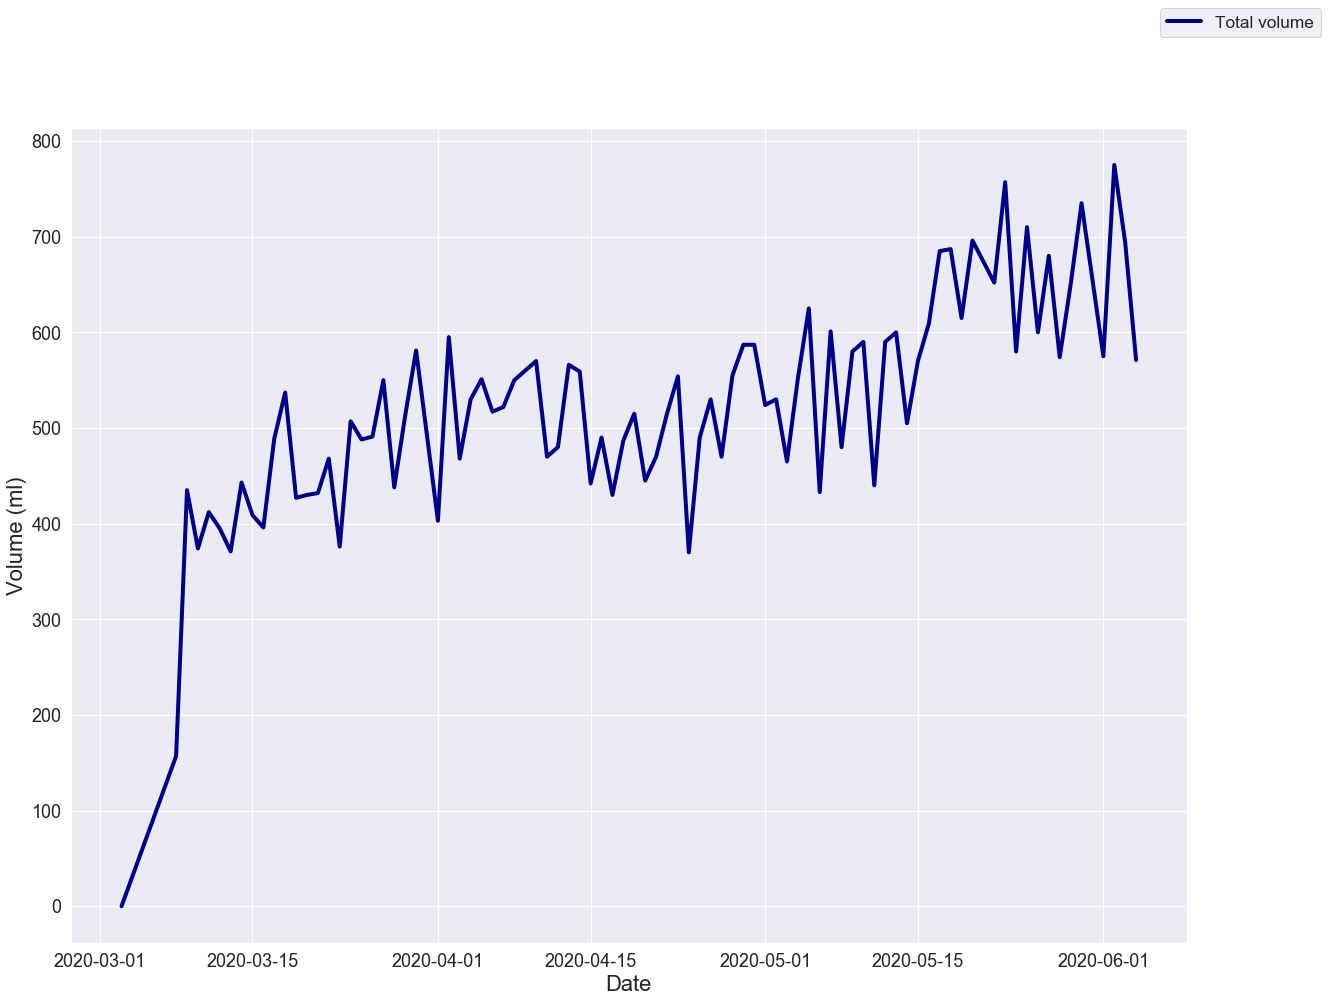

In [104]:
vol_perday = df.dropna(subset=['Volume']).groupby(['Date']).sum()['Volume']
df_vol_hist = pd.DataFrame({'Date': vol_perday.index.values, 'Volume': vol_perday.values})

vol_avg_perday = df.groupby(['Date']).mean()['Volume']
df_vol_avg_hist = pd.DataFrame({'Date': vol_avg_perday.index.values, 'Volume': vol_avg_perday.values})

fig, ax1 = plt.subplots(figsize=(20,15))
ax1.set_xlabel("Date", {'size':22})
ax1.set_ylabel('Volume (ml)', {'size':22})

ax1.plot(df_vol_hist['Date'], df_vol_hist['Volume'], label='Total volume', linestyle='-', linewidth=4, color='darkblue')
fig.legend(loc='upper right', fontsize='x-large')
plt.show()


# Milk volume average history

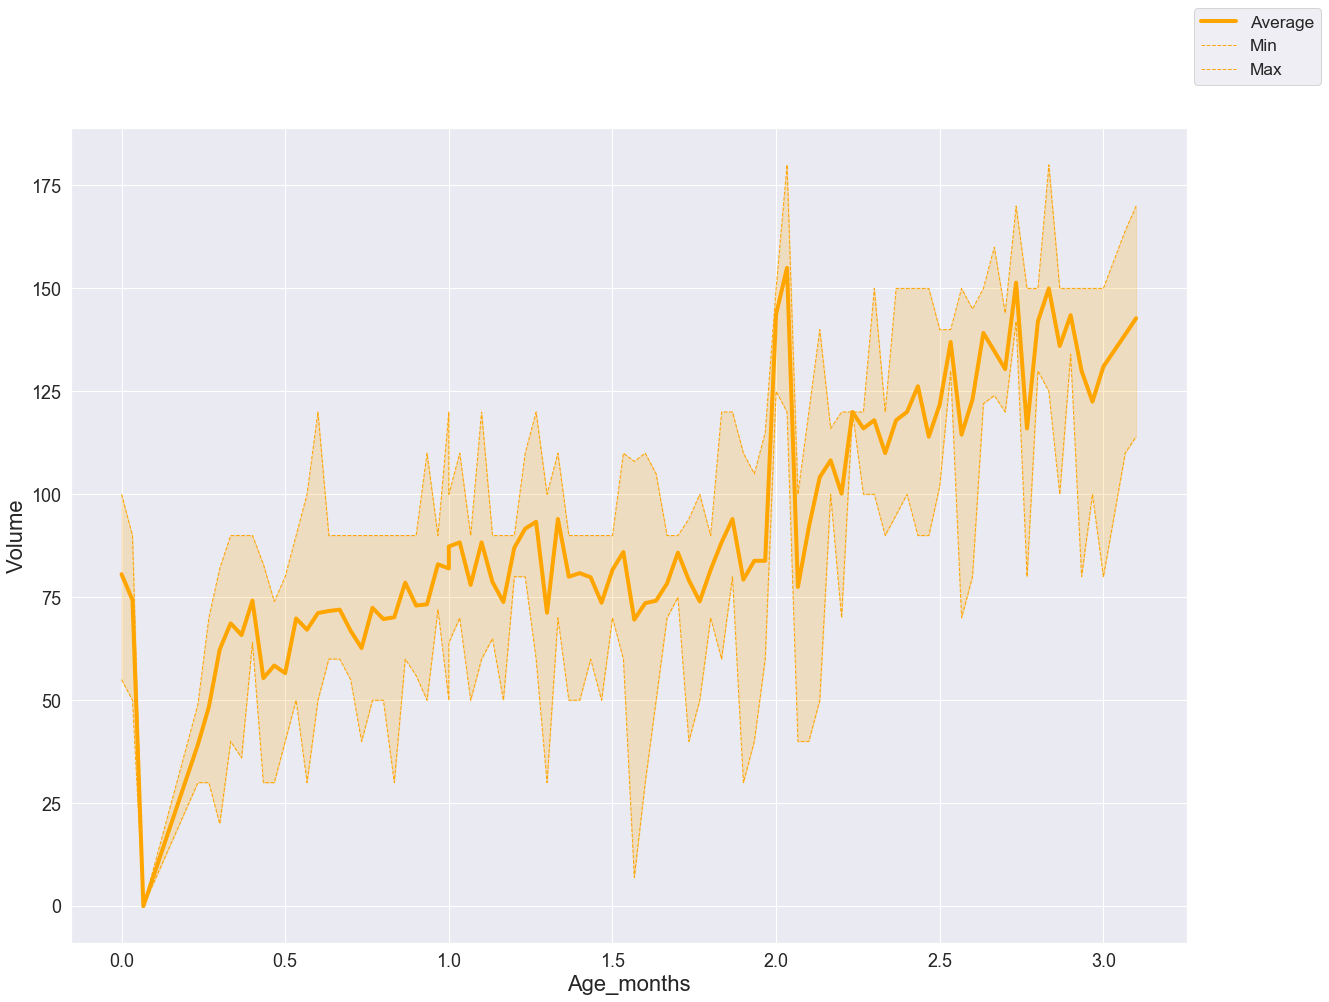

In [105]:
def plot_milk_curve():
    vol_avg_perday = df.groupby(['Age_months']).mean()['Volume']
    vol_min_perday = df.groupby(['Age_months']).min()['Volume']
    vol_max_perday = df.groupby(['Age_months']).max()['Volume']
    df_vol_avg_hist = pd.DataFrame({
        'Age_months': vol_avg_perday.index.values, 
        'Volume': vol_avg_perday.values,
        'Min': vol_min_perday.values,
        'Max': vol_max_perday.values,
    })

    fig, ax1 = plt.subplots(figsize=(20,15))
    ax1.set_ylabel("Volume", {'size':22})
    ax1.set_xlabel('Age_months', {'size':22})

    ax1.plot(df_vol_avg_hist['Age_months'], df_vol_avg_hist['Volume'], label='Average', linestyle='-', linewidth=4, color='orange')
    ax1.plot(df_vol_avg_hist['Age_months'], df_vol_avg_hist['Min'], label='Min', linestyle='--', linewidth=1, color='orange')
    ax1.plot(df_vol_avg_hist['Age_months'], df_vol_avg_hist['Max'], label='Max', linestyle='--', linewidth=1, color='orange')
    ax1.fill_between(df_vol_avg_hist['Age_months'], df_vol_avg_hist['Min'], df_vol_avg_hist['Max'], color='orange', alpha=0.2)
    
    
    fig.legend(loc='upper right', fontsize='x-large')
    plt.show()

plot_milk_curve()

### Head Circunference diameter History

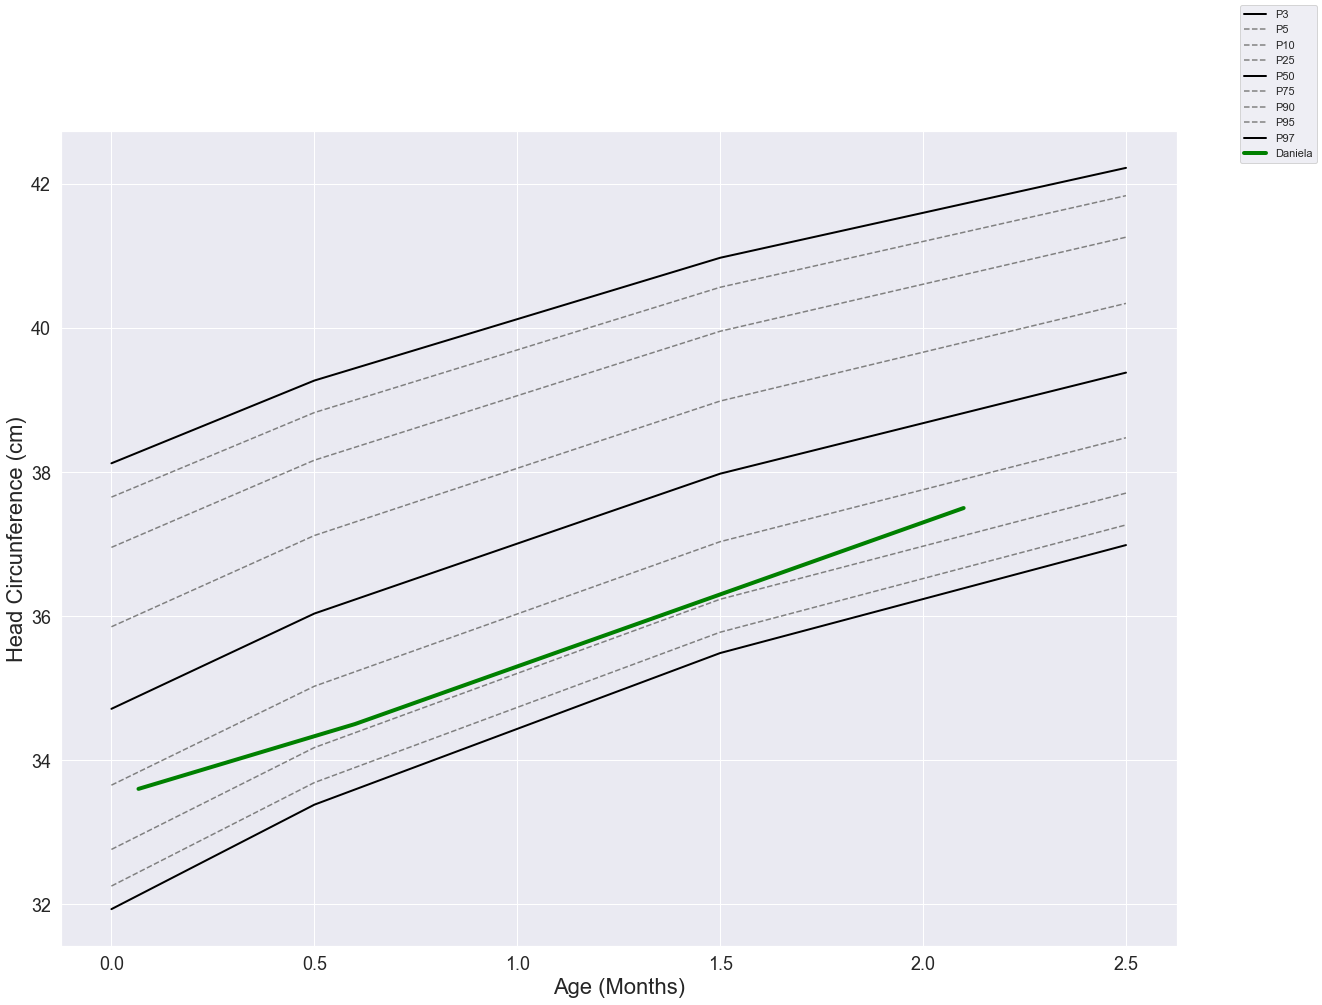

In [106]:
def plot_curve(months_zoom):
    df_info_zoom = df_hcinfo[df_hcinfo['Agemos'] <= months_zoom]
    df_zoom = df[df['Age_months'] <= months_zoom].dropna(subset=['HC'])
    
    fig, ax1 = plt.subplots(figsize=(20,15))
    ax1.set_xlabel("Age (Months)", {'size':22})
    ax1.set_ylabel("Head Circunference (cm)", {'size':22})

    for key, config in curves.items():
        if config == 'bold':
            ax1.plot(df_info_zoom['Agemos'], df_info_zoom[key], label=key, linestyle='-', linewidth=2, color='black')
        if config == 'dashed':
            ax1.plot(df_info_zoom['Agemos'], df_info_zoom[key], label=key, linestyle='--', color='gray')
    
    ax1.plot(df_zoom['Age_months'], df_zoom['HC'], label='Daniela', linestyle='-', linewidth=4, color='green')
    fig.legend(loc='upper right')
    plt.show()
    
plot_curve(months_zoom)